# EXPLORATORY ANALYSIS OF DATA OF AN POPULAR OTT PLATFORM

# BUSINESS PROBLEM

Analyze the data and generate insights that could help Netflix deciding which type of shows/movies to produce and how they can grow the business in different countries

**ABOUT NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1014]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1015]:
#loading the dataset
data = pd.read_csv("netflix.csv")

# OBSERVATIONS

In [1016]:
#shape of data
data.shape

(8807, 12)

In [1017]:
#head of data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [1018]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [1019]:
#info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [1020]:
#Describe data
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [1021]:
data.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [1022]:
#Number of null values in each columns
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [1023]:
#Percentage of null values in corresponding columns
(((data.isna().sum())/len(data))*100).round(2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

**Summary of observations**

- The data has **8807 rows** and **12 columns**

**Observation on each columns**
- The column **Show_id** is a qualitative data and has **no null** values.

- The column **type** is a categorical data **no null** values.

- The column **title** is a qualitative data and has **no null** values.

- The column **director** is ordinal data and **29.9%** of values are null.

- The column **cast** is ordinal data and **9.37%** of values are null.

- The column **country** is categorical data and **9.44%** of values are null.

- The column **date_added** is ordinal data and **0.11%** of values are null.

- The column **release_year** is a ordinal data and has **no null** values.

- The column **rating** is categorical data and **0.05%** of values are null.

- The column **duration** is categorical data and **0.03%** of values are null.

- The column **listed_in** is a categorical data and has **no null** values.

- The column **description** has **no null** values.

# DATA CLEANING

The columns **country, date_added, cast, rating, duration and director** has null values.

**1. COLUMN: country**

In [1024]:
data["country"].isnull().sum()

831

- **9.44%(831 entries)** of data in the column country are null.

**APPROACH: Replacing null values with mode of the column**

Since this is a categorical data the mode value of the is choosen to replace null values

In [1025]:
data["country"].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [1026]:
data["country"].mode()

0    United States
dtype: object

United States is the mode of the column country.

In [1027]:
data["country"] = data["country"].fillna(data["country"].mode()[0])

In [1028]:
data["country"].isnull().sum()

0

**2. COLUMN: date_added**

In [1029]:
data["date_added"].isnull().sum()

10

- **0.11%(10 entries)** of data in the column date_added are null.

**APPROACH: Changing the data type to datetime object and replacing the null values mode of the column**

Changing data in to datetime objects.

In [1030]:
data["date_added"] = pd.to_datetime(data["date_added"])

In [1031]:
data["date_added"].dtypes

dtype('<M8[ns]')

Replacing the the null values.

In [1032]:
data["date_added"].mode()

0   2020-01-01
dtype: datetime64[ns]

In [1033]:
data["date_added"] = data["date_added"].fillna(data["date_added"].mode()[0])

In [1034]:
data["date_added"].isnull().sum()

0

**3. COLUMN: cast**

In [1035]:
data["cast"].isnull().sum()

825

- **9.37%(825 entries)** of data in the column cast are null.

**APPROACH: Since column cast is an ordinal data, We can replace null values with "others"**

In [1036]:
data["cast"].replace(np.nan,"others", inplace = True)

In [1037]:
data["cast"].isnull().sum()

0

**4. COLUMN: rating**

In [1038]:
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

**Brief description of ratings**

**-TV Shows**
- TV-MA: Mature audience only
- TV-14: Parents strongly cautioned
- TV-PG: Parental guidance suggested
- TV-Y7: Directed to older children
- TV-Y : All children
- TV-G : General audiance
- TV-Y7-FV: Fantasy violence

**-Movies**
- R: Restricted - Under 17
- PG-13: Parents strongly cautioned
- PG: Parental guidance suggested
- NR: Not Rated
- G: General audiance
- NC-17: Adults only
- UR: Unrated

In [1039]:
data.loc[data["rating"] == "74 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [1040]:
data.loc[data["rating"] == "84 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [1041]:
data.loc[data["rating"] == "66 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We can refer that in rows (5541, 5794, 5813) the values of duration are mistakenly present in rating as other rows of duration are filled.

In [1042]:
# making rating values of rows (5541, 5794, 5813) null
data["rating"].replace("74 min",np.nan,inplace=True)
data["rating"].replace("84 min",np.nan,inplace=True)
data["rating"].replace("66 min",np.nan,inplace=True)

In [1043]:
data["rating"].isna().sum()

7

In [1044]:
movie = data[data["type"]=="Movie"]

In [1045]:
tv_show = data[data["type"]=="TV Show"]

In [1046]:
tv_show["rating"].isnull().sum()

2

In [1047]:
movie["rating"].isnull().sum()

5

- **7 Entries** in column rating are null values.

**APPROACH: The null values corresponding to their "type" Movies or TV shows can be replaced with mode values.**

In [1048]:
movie["rating"].mode()

0    TV-MA
dtype: object

In [1049]:
tv_show["rating"].mode()

0    TV-MA
dtype: object

In [1050]:
#since TV-MA is mode for both tv shows and movies
data["rating"] = data["rating"].fillna(movie["rating"].mode()[0])

In [1051]:
data["rating"].isnull().sum()

0

**5. COLUMN: duration**

In [1052]:
data["duration"].isnull().sum()

3

In [1053]:
data.loc[data["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,TV-MA,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,TV-MA,NaN,Movies,The comic puts his trademark hilarious/thought...


- **0.03%(3 Entries)** of column duration are null.

**APPROACH: As we found out earlier the duration values were misplace in respective rating column, we can palce those values in respective columns**

In [1054]:
data.loc[5541,"duration"] = "74 min"

In [1055]:
data.loc[5794,"duration"] = "84 min"

In [1056]:
data.loc[5813,"duration"] = "66 min"

In [1057]:
data["duration"].isnull().sum()

0

**6. COLUMN: director**

In [1058]:
data["director"].isnull().sum()

2634

- **29.9%(2634 Entries)** of the column director are null.

**APPROACH: As the values of column are ordinal data they can be replace with"others"

In [1059]:
data["director"].replace(np.nan,"others", inplace=True)

In [1060]:
data["director"].isnull().sum()

0

**NOW ALL THE NULL VALUES HAS BEEN MANAGED**

In [1061]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [1062]:
data_copy = data

# FEATURE ENGINEERING

**UNNESTING THE DATA**

**COLUMN: cast**

In [1063]:
data["cast"]

0                                                  others
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  others
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                               others
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [1064]:
cast = data["cast"].apply(lambda x: str(x).split(", ")).tolist()

In [1065]:
cast[:2]

[['others'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng']]

In [1066]:
data_cast = pd.DataFrame(cast, index=data["title"])

In [1067]:
data_cast.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,others,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,others,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None


In [1068]:
data_cast_stacked = pd.DataFrame(data_cast.stack()).reset_index()
data_cast_stacked.head()

,title,level_1,0
0,Dick Johnson Is Dead,0,others
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba


In [1069]:
data_cast_stacked = data_cast_stacked.drop(columns = ["level_1"], axis=1)
data_cast_stacked.rename(columns={0:"cast"},inplace=True)
data_cast_stacked.head()

,title,cast
0,Dick Johnson Is Dead,others
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


Unnested column is now added to original dataframe

In [1070]:
data = data.merge(data_cast_stacked, on = "title", how = "inner")
data.head()

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",others
1,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [1071]:
data.drop(columns=["cast_x"],axis=1,inplace=True)
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",others
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [1072]:
data.rename(columns = {"cast_y":"cast"},inplace=True)


**COLUMN: description**

**The column description holds no significance for data analysis**

In [1073]:
data.drop(columns=["description"],axis=1, inplace=True)
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,others
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata
2,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Khosi Ngema
3,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Gail Mabalane
4,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Thabang Molaba


**COLUMN: listed_in**

In [1074]:
data["listed_in"]

0                                          Documentaries
1        International TV Shows, TV Dramas, TV Mysteries
2        International TV Shows, TV Dramas, TV Mysteries
3        International TV Shows, TV Dramas, TV Mysteries
4        International TV Shows, TV Dramas, TV Mysteries
                              ...                       
64946     Dramas, International Movies, Music & Musicals
64947     Dramas, International Movies, Music & Musicals
64948     Dramas, International Movies, Music & Musicals
64949     Dramas, International Movies, Music & Musicals
64950     Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 64951, dtype: object

In [1075]:
genre = data["listed_in"].apply(lambda x: str(x).split(", ")).tolist()

In [1076]:
genre[:5]

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries']]

In [1077]:
data_genre = pd.DataFrame(genre,index=data["title"])
data_genre.head()

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Blood & Water,International TV Shows,TV Dramas,TV Mysteries


In [1078]:
data_genre_stacked = pd.DataFrame(data_genre.stack()).reset_index()
data_genre_stacked.head()

,title,level_1,0
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Blood & Water,0,International TV Shows


In [1079]:
data_genre_stacked.drop(columns=["level_1"],axis=1,inplace=True)
data_genre_stacked.rename(columns={0:"genre"},inplace=True)
data_genre_stacked.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Blood & Water,International TV Shows


In [1080]:
data = data.merge(data_genre_stacked, on="title", how="inner")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,others,Documentaries
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,International TV Shows


In [1081]:
data.drop(columns=["listed_in"],axis=1,inplace=True)
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,cast,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,others,Documentaries
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows


**COLUMN: duration**

In [1082]:
data["runtime"] = data["duration"].apply(lambda x: str(x).split(" ")[1])
data["duration"] = data["duration"].apply(lambda x: str(x).split(" ")[0])
data["duration"] = data["duration"].astype(int)

In [1083]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,cast,genre,runtime
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,others,Documentaries,min
1,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2,Ama Qamata,International TV Shows,Seasons
2,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2,Ama Qamata,TV Dramas,Seasons
3,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2,Ama Qamata,TV Mysteries,Seasons
4,s2,TV Show,Blood & Water,others,South Africa,2021-09-24,2021,TV-MA,2,Ama Qamata,International TV Shows,Seasons


# VISUAL ANALYSIS OF DATA

# 1.Comparing the distribution of Movies and TV Shows

In [1087]:
(((data_copy["type"].value_counts())/len(data_copy["type"]))*100).round(2)

Movie      69.62
TV Show    30.38
Name: type, dtype: float64

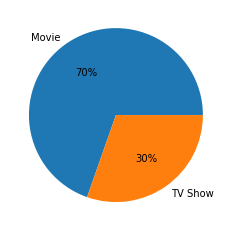

In [1088]:
n_movie = data_copy[data_copy["type"] == "Movie"].shape[0]
n_tvshow = data_copy[data_copy["type"] == "TV Show"].shape[0]
pie_data = [n_movie,n_tvshow]
pie_labels = ["Movie","TV Show"]

plt.pie(x=pie_data,labels=pie_labels,autopct="%.0f%%")
plt.show()

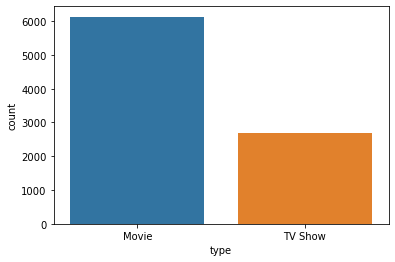

In [1089]:
sns.countplot(x="type", data=data_copy)
plt.show()

**Observation**

- **69.62%** are Movies.
- **30.38%** are TV Shows.

# Country wise distribution of Movies and TV Shows

In [1116]:
count_movies_per_country = movie.groupby(['country'])["type"].count().sort_values(ascending=False)
data_movies_per_country = pd.DataFrame(count_movies_per_country)
data_movies_per_country.rename(columns={'type':'count'},inplace = True)
data_movies_per_country = data_movies_per_country.reset_index()[:10]
data_movies_per_country

,country,count
0,United States,2498
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Turkey,76
9,Japan,76


In [1117]:
count_series_per_country = tv_show.groupby(['country'])["type"].count().sort_values(ascending=False)
data_series_per_country = pd.DataFrame(count_series_per_country)
data_series_per_country.rename(columns={'type':'count'},inplace = True)
data_series_per_country = data_series_per_country.reset_index()[:10]
data_series_per_country

,country,count
0,United States,1151
1,United Kingdom,213
2,Japan,169
3,South Korea,158
4,India,79
5,Taiwan,68
6,Canada,59
7,France,49
8,Australia,48
9,Spain,48


In [1118]:
merge_plot1=data_movies_per_country.merge(data_series_per_country, on = 'country', how = 'outer')
merge_plot1

,country,count_x,count_y
0,United States,2498.0,1151.0
1,India,893.0,79.0
2,United Kingdom,206.0,213.0
3,Canada,122.0,59.0
4,Spain,97.0,48.0
5,Egypt,92.0,NaN
6,Nigeria,86.0,NaN
7,Indonesia,77.0,NaN
8,Turkey,76.0,NaN
9,Japan,76.0,169.0


In [1119]:
merge_plot1['count_x'].replace(np.nan,0, inplace =True)
merge_plot1['count_y'].replace(np.nan,0, inplace =True)

In [1120]:
merge_plot1.rename(columns = {'count_x':'movies_count','count_y':'series_count'},inplace=True)

In [1121]:
merge_plot1.index = np.arange(1, len(merge_plot1)+1)

In [1122]:
merge_plot1 =merge_plot1.set_index('country')

In [1123]:
merge_plot1

,movies_count,series_count
country,,
United States,2498.0,1151.0
India,893.0,79.0
United Kingdom,206.0,213.0
Canada,122.0,59.0
Spain,97.0,48.0
Egypt,92.0,0.0
Nigeria,86.0,0.0
Indonesia,77.0,0.0
Turkey,76.0,0.0


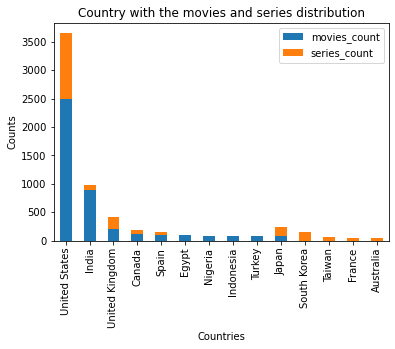

In [1124]:
merge_plot1.plot(kind='bar',stacked=True)
plt.title('Country with the movies and series distribution')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.show()

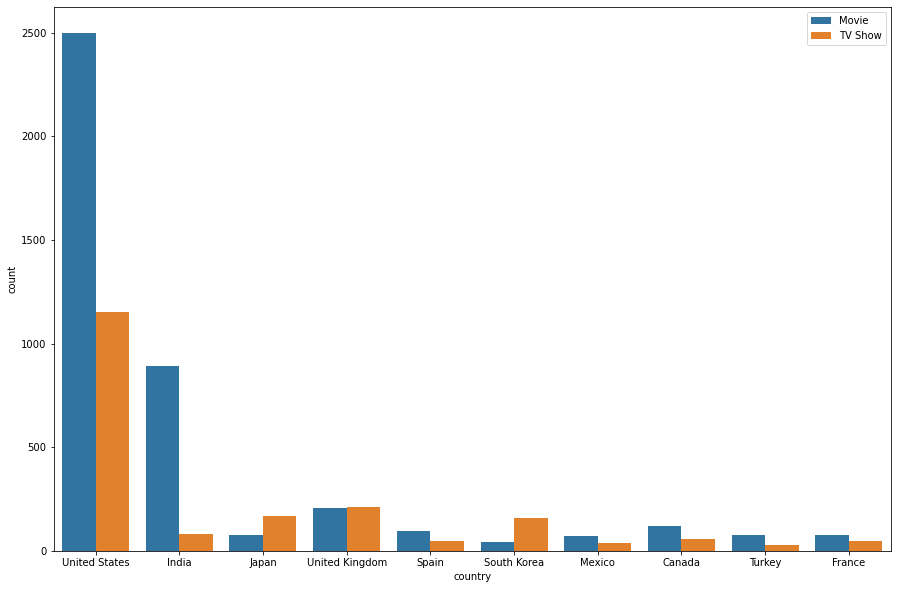

In [1125]:
plt.figure(figsize=(15,10))
sns.countplot(data= data_copy, x= 'country' , hue= 'type',order = data["country"].value_counts().index[:10])
plt.legend(loc="upper right")
plt.show()

# INSIGHTS : It is observed that United states leads the world in both TV shows and Movies, India stands second in the list, followed by United kingdom and Japan.
### In India, it is observed that TV shows are least popular compared to movies
### In South Korea and Japan, TV shows are more popular compate to movies

# 2. Most Popular Type Of Rating

Top 5 rating

In [1092]:
rating = data_copy["rating"].value_counts().reset_index()[:11]
rating

,index,rating
0,TV-MA,3214
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


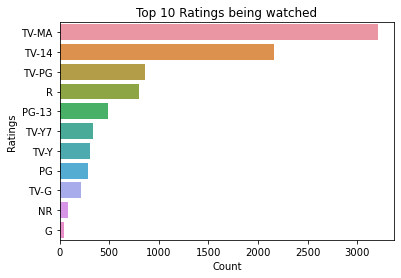

In [1093]:
sns.barplot(y = rating["index"], x=rating["rating"],data=rating)
plt.xlabel("Count")
plt.ylabel("Ratings")
plt.title("Top 10 Ratings being watched")
plt.show()

# INSIGHTS: Mature audience TV Shows (TV-MA) are more popular followed by TV shows for kids above 14(TV-14)

# 3. Most Popular Director

Top 10 Directors

In [1095]:
director = data_copy["director"].value_counts().reset_index()[1:11]
director

,index,director
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Steven Spielberg,11


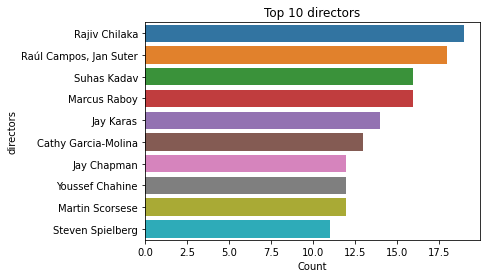

In [1096]:
sns.barplot(y = director["index"], x=director["director"],data=director)
plt.xlabel("Count")
plt.ylabel("directors")
plt.title("Top 10 directors")
plt.show()

# INSIGHTS: Rajiv Chilaka is the most popular director

# 4.Most popular Actor

Top 10 Actors

In [1097]:
actors = data["cast"].value_counts().reset_index()[1:11]
actors

,index,cast
1,Anupam Kher,1135
2,Takahiro Sakurai,1076
3,Yuki Kaji,1036
4,Shah Rukh Khan,929
5,Yuichi Nakamura,825
6,Akshay Kumar,788
7,Daisuke Ono,782
8,Junichi Suwabe,745
9,Paresh Rawal,738
10,Naseeruddin Shah,718


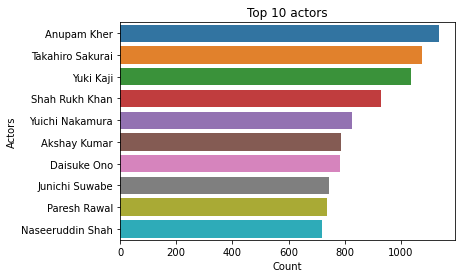

In [1098]:
sns.barplot(y = actors["index"], x=actors["cast"],data=actors)
plt.xlabel("Count")
plt.ylabel("Actors")
plt.title("Top 10 actors")
plt.show()

# INSIGHTS: Anupam Kher is the most popular Actor

# 5. Most popular genre

Top 10 genre

In [1099]:
genre = data["genre"].value_counts().reset_index()[:11]
genre

,index,genre
0,Dramas,197392
1,International Movies,185605
2,Comedies,157059
3,International TV Shows,136997
4,TV Dramas,94995
5,Action & Adventure,83810
6,Children & Family Movies,62416
7,Independent Movies,58190
8,Romantic Movies,50353
9,Crime TV Shows,49740


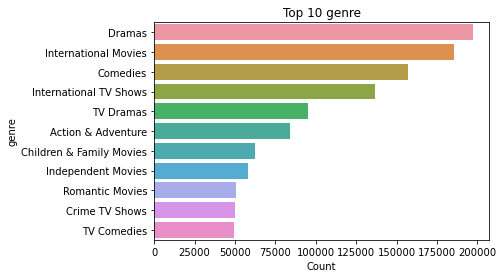

In [1100]:
sns.barplot(y = genre["index"], x=genre["genre"],data=actors)
plt.xlabel("Count")
plt.ylabel("genre")
plt.title("Top 10 genre")
plt.show()

# INSIGHTS: Dramas is the most popular kind of genre watched followed by International movies

# Growth Of Netflix Content Over The years

In [1111]:
data_copy['month'] = data_copy['date_added'].dt.month_name()
data_copy['added_year'] = data_copy['date_added'].dt.year

In [1112]:
count_content_per_year = data_copy.groupby(['added_year'])["type"].count().sort_values(ascending=False)
df_content_per_year = pd.DataFrame(count_content_per_year)

In [1113]:
df_content_per_year.rename(columns = {"type":"count"},inplace=True)
df_content_per_year = df_content_per_year.reset_index()

In [1114]:
df_content_per_year

,added_year,count
0,2019,2016
1,2020,1889
2,2018,1649
3,2021,1498
4,2017,1188
5,2016,429
6,2015,82
7,2014,24
8,2011,13
9,2013,11


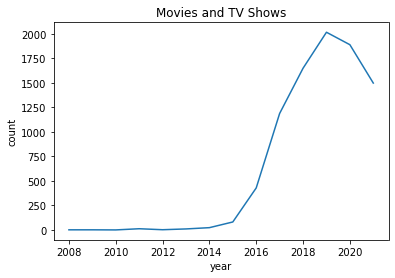

In [1115]:
sns.lineplot(x=df_content_per_year["added_year"], y=df_content_per_year["count"],data=df_content_per_year)
plt.xlabel("year")
plt.ylabel("count")
plt.title("Movies and TV Shows")
plt.show()

## INSIGHTS
### There is a increase in the number of content produced from 2014 to 2018, this might be due to the internet being easily made available for everyone, thus with better internet and cheaper plans, users started using OTT more liberally

### But after 2019, popularity takes a slump, this might be due to the COVID pandemic, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, Hence hastily created content are less popular

# BUSSINESS INSIGHTS

**1. DISTRIBUTION OF MOVIES AND TV SHOWS**
- It is observed that movies are more popular content among viewers than TV shows in general.
- 69.62% are Movies and 30.83% are TV Shows.
- When compared the popularity of Movies and TV Shows country wise, the data shows that the percentage of TV Shows are popular in countries south korea and japan.

**2. MOST POPULAR RATING**
- TV shows for mature audience (TV-MA) are more popular with over 3211 entries than content rated otherwise.
- It is followed by TV-14 (2160 entries) for kids of 14 years and above.

**3. MOST POPULAR DIRECTOR**
- Rajiv Chilaka is the most popular director followed by raul campos and jan suter.

**4. MOST POPULAR ACTOR**
- Anupam kher is the most popular actor followed by Takahiro sakurai and yuki kaji.

**5. MOST POPULAR GENRE**
- Dramas, International and comedies movies are the most popular genre.

**6. MOST POPULAR COUNTRY OF PRODUCTION OF MOVIES AND TV SHOWS**
- Movies and TV shows from United states from United States are the most popular.
- Almost 2498 movies and 1151 TV shows are from United states.
- It is followed by India with over 893 movies and 79 TV shows.

**7. GROWTH OF NETFLIX**
- There is a increase in the number of content produced from 2014 to 2018, this might be due to the internet being easily made available for everyone, thus with better internet and cheaper plans, users started using OTT more liberally.
- But after 2019, popularity takes a slump, this might be due to the COVID pandemic, since the entire world was on lockdown, it would have been difficult for the movie/TV show production to happen, Hence hastily created content are less popular.


# RECOMMENDATIONS

**1. DISTRIBUTION OF MOVIES AND TV SHOWS**

**INSIGHTS:**
- It is observed that movies are more popular content among viewers than TV shows in general.
- 69.62% are Movies and 30.83% are TV Shows.
- When compared the popularity of Movies and TV Shows country wise, the data shows that the percentage of TV Shows are popular in countries south korea and japan.

**RECOMMENDATION:**
- Based on the analysis of the data, It is recommended that netflix should concentrate more on making movies than TV Shows.
- In countries south korea and japan is recommended tha netflix should concentrate more on making TV Shows than movies.

**2. RATING** 

**INSIGHTS:**
- The top 10 popular ratings are given below.

In [1126]:
rating

,index,rating
0,TV-MA,3214
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


**RECOMMENDATIONS:**
- TV shows for mature audience (TV-MA) are more popular with over 3211 entries than content rated otherwise.
- It is followed by TV-14 (2160 entries) for kids of 14 years and above.
- Hence it is recommended that netflix should produce content for Adults and Kids.

**3. GENRE**
- The top 10 most popular genre.

In [1127]:
genre

,index,genre
0,Dramas,197392
1,International Movies,185605
2,Comedies,157059
3,International TV Shows,136997
4,TV Dramas,94995
5,Action & Adventure,83810
6,Children & Family Movies,62416
7,Independent Movies,58190
8,Romantic Movies,50353
9,Crime TV Shows,49740


**RECOMMENDATIONS**
- Dramas, International and comedies movies are the most popular genre.
- Netflix should concentrate on producing movies and TV Shows based on top genres.

**4. COUNTRY**

**INSIGHTS:**
- Movies and TV shows from United states from United States are the most popular.
- Almost 2498 movies and 1151 TV shows are from United states.
- It is followed by India with over 893 movies and 79 TV shows.

**RECOMMENDATIONS:**
- Netflix should be working with content creators from United States.
